In [67]:
import pandas as pd
import numpy as np 
import altair as alt

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [68]:
college_data = pd.read_csv('../public_data/electoral_college_vote.csv')
census_pop_data = pd.read_csv('../public_data/us_census_population.csv')

In [69]:
college_data.head()

,Year,Electoral college vote count,State
0,1788,0,Alabama
1,1792,0,Alabama
2,1796,0,Alabama
3,1800,0,Alabama
4,1804,0,Alabama


In [70]:
census_pop_data.head()

,Year,State,Census population
0,1790,Alabama,0
1,1800,Alabama,1250
2,1810,Alabama,9046
3,1820,Alabama,127901
4,1830,Alabama,309527


In [71]:
college_data['Census year reference'] = (np.floor((college_data['Year'] - 1)/10)*10).astype(int)

In [72]:
college_data.head()

,Year,Electoral college vote count,State,Census year reference
0,1788,0,Alabama,1780
1,1792,0,Alabama,1790
2,1796,0,Alabama,1790
3,1800,0,Alabama,1790
4,1804,0,Alabama,1800


In [73]:
college_data_merged = college_data.merge(
    census_pop_data, how='left', left_on=['Census year reference', 'State'], right_on=['Year', 'State']
).dropna()

In [74]:
college_data_merged.head()

,Year_x,Electoral college vote count,State,Census year reference,Year_y,Census population
1,1792,0,Alabama,1790,1790.0,0.0
2,1796,0,Alabama,1790,1790.0,0.0
3,1800,0,Alabama,1790,1790.0,0.0
4,1804,0,Alabama,1800,1800.0,1250.0
5,1808,0,Alabama,1800,1800.0,1250.0


In [75]:
college_data_merged = college_data_merged.drop(['Year_y'], axis=1).rename(columns={"Year_x": "Year"})

In [77]:
college_data_merged['Census population'] = college_data_merged['Census population'].astype(int)

In [78]:
college_data_merged

,Year,Electoral college vote count,State,Census year reference,Census population
1,1792,0,Alabama,1790,0
2,1796,0,Alabama,1790,0
3,1800,0,Alabama,1790,0
4,1804,0,Alabama,1800,1250
5,1808,0,Alabama,1800,1250
...,...,...,...,...,...
3004,2004,3,Wyoming,2000,493782
3005,2008,3,Wyoming,2000,493782
3006,2012,3,Wyoming,2010,563626
3007,2016,3,Wyoming,2010,563626


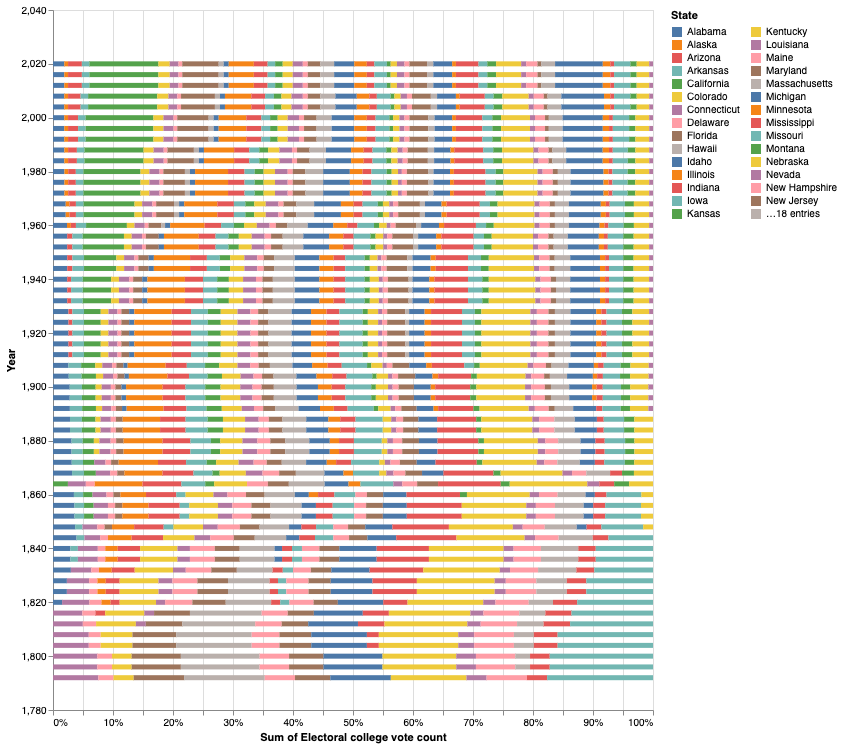

In [87]:
alt.Chart(college_data_merged).mark_bar().encode(
    x=alt.X('sum(Electoral college vote count)', stack="normalize", axis=alt.Axis(format='%')),
    y='Year',
    color=alt.Color('State', legend=alt.Legend(columns=2))
).properties(width=600, height=700)

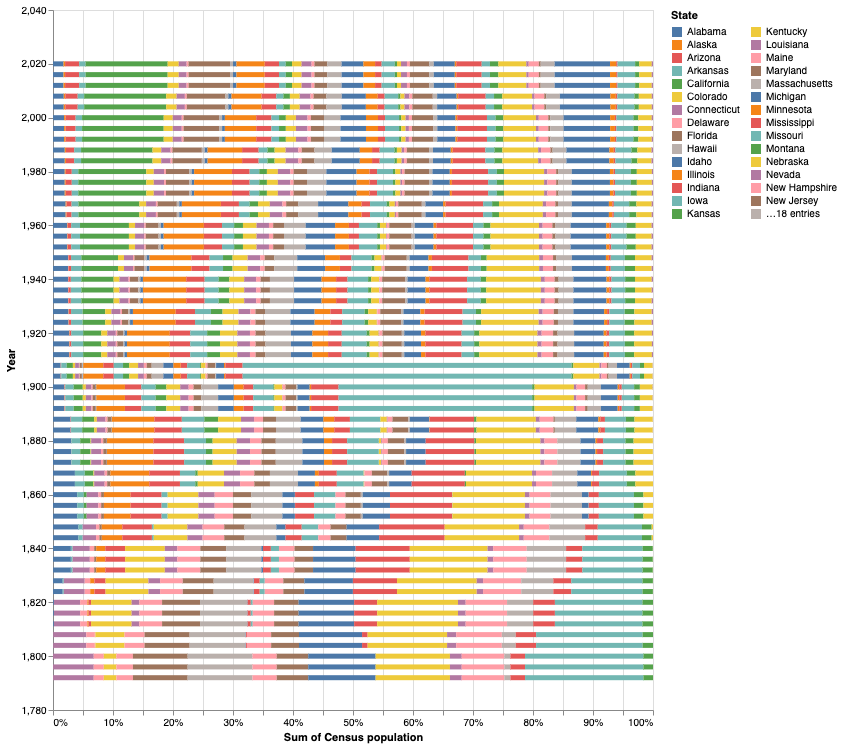

In [89]:
alt.Chart(college_data_merged).mark_bar().encode(
    x=alt.X('sum(Census population)', stack="normalize", axis=alt.Axis(format='%')),
    y='Year',
    color=alt.Color('State', legend=alt.Legend(columns=2))
).properties(width=600, height=700)